<a href="https://colab.research.google.com/github/kriskalb/employee-attrition-prediction/blob/main/Project_classification_attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyarrow
!pip install xgboost
!pip install optuna

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import xgboost as xgb
import optuna
import pyarrow.parquet as pq
import warnings

warnings.simplefilter("ignore")
pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_original= pd.read_csv('/content/drive/MyDrive/Kurs/employee_attrition_prediction/attrition.csv',sep =',', encoding='utf-8')

In [ ]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4449 entries, 0 to 4448
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   EmployeeNumber  4449 non-null   int64 
 1   Attrition       4302 non-null   object
dtypes: int64(1), object(1)
memory usage: 69.6+ KB


In [ ]:
df1= pd.read_csv('/content/drive/MyDrive/Kurs/employee_attrition_prediction/df1.csv',sep =',', encoding='utf-8')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4449 entries, 0 to 4448
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeNumber           4449 non-null   int64  
 1   Age                      4449 non-null   float64
 2   BusinessTravel           4449 non-null   object 
 3   DailyRate                4449 non-null   float64
 4   Department               4449 non-null   object 
 5   DistanceFromHome         4449 non-null   float64
 6   Education                4449 non-null   float64
 7   EducationField           4449 non-null   object 
 8   EmployeeCount            4449 non-null   float64
 9   EnvironmentSatisfaction  4449 non-null   float64
 10  Gender                   4449 non-null   object 
 11  HourlyRate               4449 non-null   float64
 12  JobInvolvement           4449 non-null   float64
 13  JobLevel                 4449 non-null   float64
 14  JobRole                 

In [ ]:
df2= pd.read_csv('/content/drive/MyDrive/Kurs/employee_attrition_prediction/df2.csv',sep =',', encoding='utf-8')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4449 entries, 0 to 4448
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            4449 non-null   int64  
 1   Over18                    4449 non-null   object 
 2   OverTime                  4449 non-null   object 
 3   PercentSalaryHike         4449 non-null   float64
 4   PerformanceRating         4449 non-null   float64
 5   RelationshipSatisfaction  4449 non-null   float64
 6   StandardHours             4449 non-null   float64
 7   StockOptionLevel          4449 non-null   float64
 8   TotalWorkingYears         4449 non-null   float64
 9   TrainingTimesLastYear     4449 non-null   float64
 10  WorkLifeBalance           4449 non-null   float64
 11  YearsAtCompany            4449 non-null   float64
 12  YearsInCurrentRole        4449 non-null   float64
 13  YearsSinceLastPromotion   4449 non-null   float64
 14  YearsWit

In [ ]:
df = df1.merge(df2.drop(columns='Attrition'), on='EmployeeNumber', how='outer')
df = df.merge(df_original, on='EmployeeNumber', how='outer', suffixes=('', '_from_attrition'))
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4449 entries, 0 to 4448
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            4449 non-null   int64  
 1   Age                       4449 non-null   float64
 2   BusinessTravel            4449 non-null   object 
 3   DailyRate                 4449 non-null   float64
 4   Department                4449 non-null   object 
 5   DistanceFromHome          4449 non-null   float64
 6   Education                 4449 non-null   float64
 7   EducationField            4449 non-null   object 
 8   EmployeeCount             4449 non-null   float64
 9   EnvironmentSatisfaction   4449 non-null   float64
 10  Gender                    4449 non-null   object 
 11  HourlyRate                4449 non-null   float64
 12  JobInvolvement            4449 non-null   float64
 13  JobLevel                  4449 non-null   float64
 14  JobRole 

In [ ]:
df.head()

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome,Attrition
0,104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,1.0,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,15998.0,1.0,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,61512.0,No
1,1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,1.0,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,14199.0,3.0,Y,Yes,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,93072.0,No
2,164,26.0,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,1.0,3.0,Female,46.0,2.0,1.0,Research Scientist,2.0,Married,2368.0,23300.0,1.0,Y,No,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,28416.0,No
3,395,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,1.0,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,4488.0,1.0,Y,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,39720.0,No
4,53,35.0,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,1.0,3.0,Male,75.0,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,10910.0,1.0,Y,No,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,23412.0,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4449 entries, 0 to 4448
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            4449 non-null   int64  
 1   Age                       4449 non-null   float64
 2   BusinessTravel            4449 non-null   object 
 3   DailyRate                 4449 non-null   float64
 4   Department                4449 non-null   object 
 5   DistanceFromHome          4449 non-null   float64
 6   Education                 4449 non-null   float64
 7   EducationField            4449 non-null   object 
 8   EmployeeCount             4449 non-null   float64
 9   EnvironmentSatisfaction   4449 non-null   float64
 10  Gender                    4449 non-null   object 
 11  HourlyRate                4449 non-null   float64
 12  JobInvolvement            4449 non-null   float64
 13  JobLevel                  4449 non-null   float64
 14  JobRole 

In [ ]:
df.columns.unique

<bound method Index.unique of Index(['EmployeeNumber', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'YearlyIncome', 'Attrition'],
      dtype='object')>

In [ ]:
df = df.loc[:, ~df.columns.duplicated()]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4449 entries, 0 to 4448
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            4449 non-null   int64  
 1   Age                       4449 non-null   float64
 2   BusinessTravel            4449 non-null   object 
 3   DailyRate                 4449 non-null   float64
 4   Department                4449 non-null   object 
 5   DistanceFromHome          4449 non-null   float64
 6   Education                 4449 non-null   float64
 7   EducationField            4449 non-null   object 
 8   EmployeeCount             4449 non-null   float64
 9   EnvironmentSatisfaction   4449 non-null   float64
 10  Gender                    4449 non-null   object 
 11  HourlyRate                4449 non-null   float64
 12  JobInvolvement            4449 non-null   float64
 13  JobLevel                  4449 non-null   float64
 14  JobRole 

In [ ]:
df.isnull().sum()

EmployeeNumber                0
Age                           0
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtCompany                0
YearsInC

In [ ]:
df = df.dropna()
df

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome,Attrition
0,104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,1.0,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,15998.0,1.0,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,61512.0,No
1,1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,1.0,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,14199.0,3.0,Y,Yes,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,93072.0,No
2,164,26.0,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,1.0,3.0,Female,46.0,2.0,1.0,Research Scientist,2.0,Married,2368.0,23300.0,1.0,Y,No,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,28416.0,No
3,395,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,1.0,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,4488.0,1.0,Y,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,39720.0,No
4,53,35.0,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,1.0,3.0,Male,75.0,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,10910.0,1.0,Y,No,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,23412.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4444,7975,8823.0,Travel_Rarely,621.0,Research & Development,15.0,3.0,Medical,1.0,1.0,Female,73.0,3.0,3.0,Healthcare Representative,4.0,Married,7978.0,14075.0,1.0,Y,No,11.0,3.0,4.0,80.0,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,95736.0,Yes
4445,7976,8823.0,Travel_Rarely,621.0,Research & Development,15.0,3.0,Medical,1.0,1.0,Female,73.0,3.0,3.0,Healthcare Representative,4.0,Married,7978.0,14075.0,1.0,Y,No,11.0,3.0,4.0,80.0,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,95736.0,Yes
4446,7977,44.0,Non-Travel,381.0,Research & Development,918785.0,3.0,Medical,1.0,1.0,Male,49.0,1.0,1.0,Laboratory Technician,3.0,Single,3708.0,2104.0,2.0,Y,No,14.0,3.0,3.0,80.0,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,44496.0,Yes
4447,7978,44.0,Non-Travel,381.0,Research & Development,918785.0,3.0,Medical,1.0,1.0,Male,49.0,1.0,1.0,Laboratory Technician,3.0,Single,3708.0,2104.0,2.0,Y,No,14.0,3.0,3.0,80.0,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,44496.0,Yes


In [ ]:
df.isnull().sum()

EmployeeNumber              0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [ ]:
#Backup
parquet_file_path = '/content/drive/MyDrive/Kurs/employee_attrition_prediction/df_after_merging.parquet'

df.to_parquet(parquet_file_path, engine='pyarrow')

In [ ]:
parquet_file_path = '/content/drive/MyDrive/Kurs/employee_attrition_prediction/df_after_merging.parquet'
table = pq.read_table(parquet_file_path)
df = table.to_pandas()

In [ ]:
for col in ['Gender', 'JobRole', 'OverTime', 'Attrition']:
    df[col] = df[col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4302 entries, 0 to 4448
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   EmployeeNumber            4302 non-null   int64   
 1   Age                       4302 non-null   float64 
 2   BusinessTravel            4302 non-null   object  
 3   DailyRate                 4302 non-null   float64 
 4   Department                4302 non-null   object  
 5   DistanceFromHome          4302 non-null   float64 
 6   Education                 4302 non-null   float64 
 7   EducationField            4302 non-null   object  
 8   EmployeeCount             4302 non-null   float64 
 9   EnvironmentSatisfaction   4302 non-null   float64 
 10  Gender                    4302 non-null   category
 11  HourlyRate                4302 non-null   float64 
 12  JobInvolvement            4302 non-null   float64 
 13  JobLevel                  4302 non-null   float6

# Initial data analyze and visualization

In [ ]:
df.describe()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome
count,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.0,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.0,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000
mean,4809.243143,429.123199,800.843794,34478.313343,2.906788,1.0,2.719665,66.036495,2.741516,2.051604,2.722920,6453.266853,14266.381450,2.677359,15.164110,3.146444,2.725709,80.0,0.787773,354.004649,2.803347,2.765923,312.854719,367.109484,399.000930,334.767550,77439.202232
std,2643.040205,1591.153416,405.655763,147682.315767,1.026460,0.0,1.092333,20.298352,0.711379,1.102569,1.106692,4672.993959,7154.584275,2.490632,3.624112,0.353591,1.079747,0.0,0.849147,1508.016854,1.302586,0.708878,1373.999529,1480.107024,1597.939659,1431.991884,56075.927510
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12108.000000
25%,1680.250000,31.000000,457.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,2897.000000,7910.250000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,34764.000000
50%,5828.500000,36.000000,804.000000,8.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,3.000000,4876.000000,14174.000000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,58512.000000
75%,6903.750000,45.000000,1162.000000,17.000000,4.000000,1.0,4.000000,84.000000,3.000000,3.000000,4.000000,8307.750000,20471.000000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,17.000000,3.000000,3.000000,10.000000,7.000000,4.000000,7.000000,99693.000000
max,7979.000000,9890.000000,1499.000000,999590.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,9939.000000,6.000000,4.000000,9984.000000,9937.000000,9990.000000,9882.000000,239988.000000


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
EmployeeNumber,4302.0,4809.243143,2643.040205,1.0,1680.25,5828.5,6903.75,7979.0
Age,4302.0,429.123199,1591.153416,18.0,31.00,36.0,45.00,9890.0
DailyRate,4302.0,800.843794,405.655763,102.0,457.00,804.0,1162.00,1499.0
DistanceFromHome,4302.0,34478.313343,147682.315767,1.0,2.00,8.0,17.00,999590.0
Education,4302.0,2.906788,1.026460,1.0,2.00,3.0,4.00,5.0
EmployeeCount,4302.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EnvironmentSatisfaction,4302.0,2.719665,1.092333,1.0,2.00,3.0,4.00,4.0
HourlyRate,4302.0,66.036495,20.298352,30.0,48.00,66.0,84.00,100.0
JobInvolvement,4302.0,2.741516,0.711379,1.0,2.00,3.0,3.00,4.0
JobLevel,4302.0,2.051604,1.102569,1.0,1.00,2.0,3.00,5.0


In [ ]:
df.describe(include=['category']).T

,count,unique,top,freq
Gender,4302,2,Male,2595
JobRole,4302,9,Sales Executive,950
OverTime,4302,2,No,3089
Attrition,4302,2,Yes,2222


<Axes: >

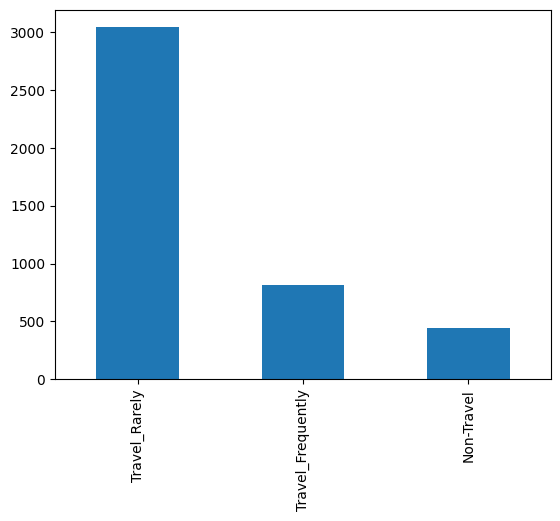

In [ ]:
df['BusinessTravel'].value_counts().plot(kind='bar')

<Axes: >

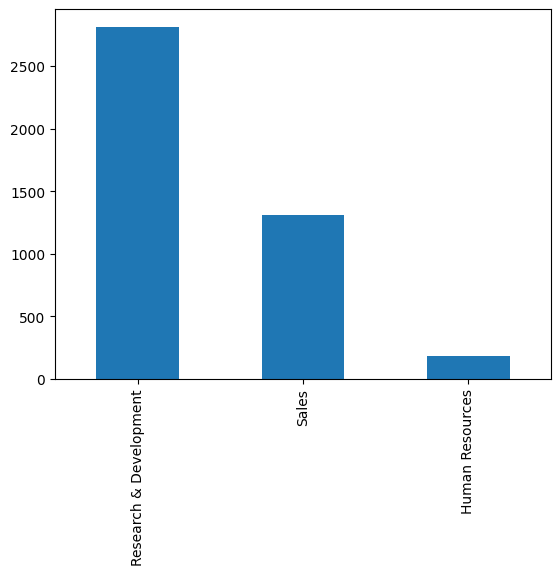

In [ ]:
df['Department'].value_counts().plot(kind='bar')

<Axes: >

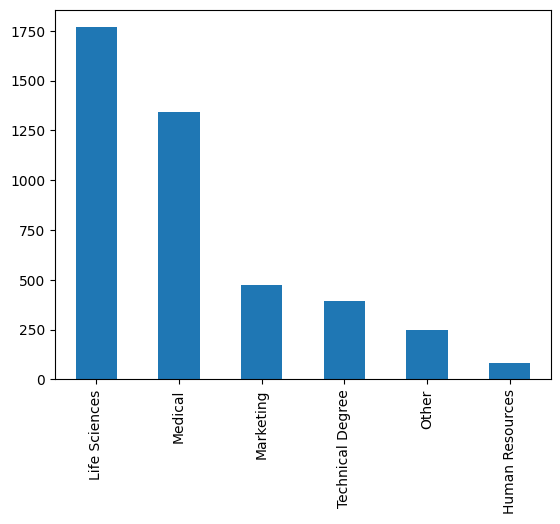

In [ ]:
df['EducationField'].value_counts().plot(kind='bar')

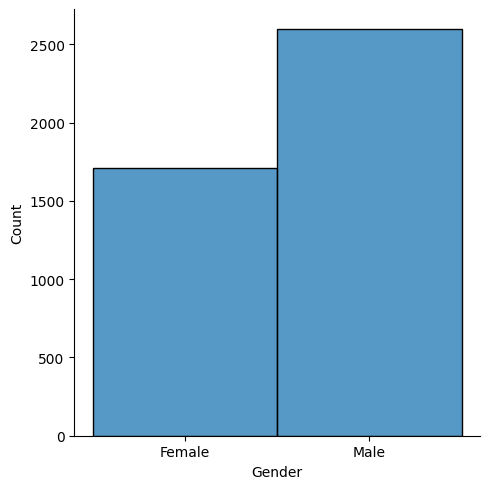

In [ ]:
sns.displot(df['Gender'])
plt.show()

<Axes: >

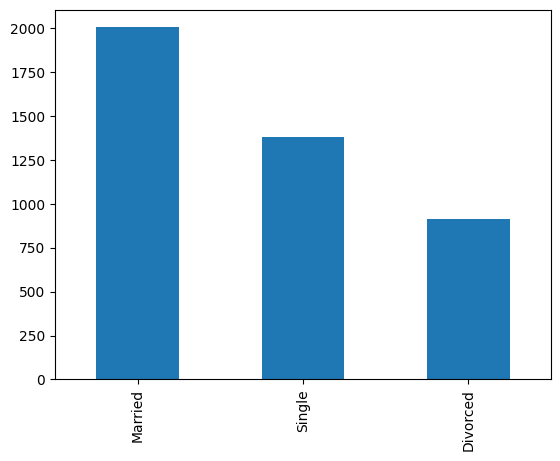

In [ ]:
df['MaritalStatus'].value_counts().plot(kind='bar')

<Axes: >

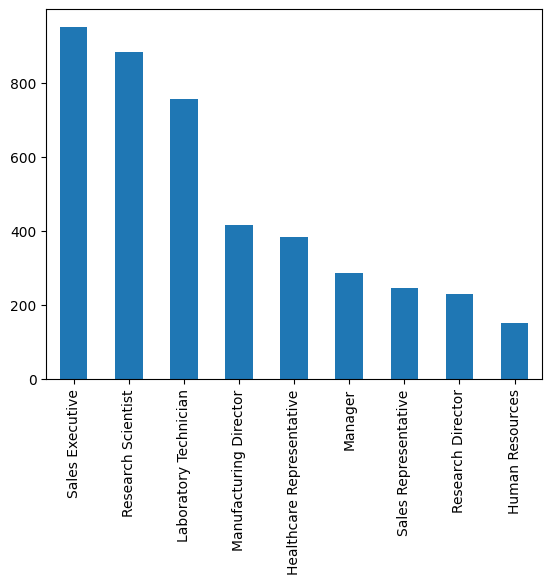

In [ ]:
df['JobRole'].value_counts().plot(kind='bar')

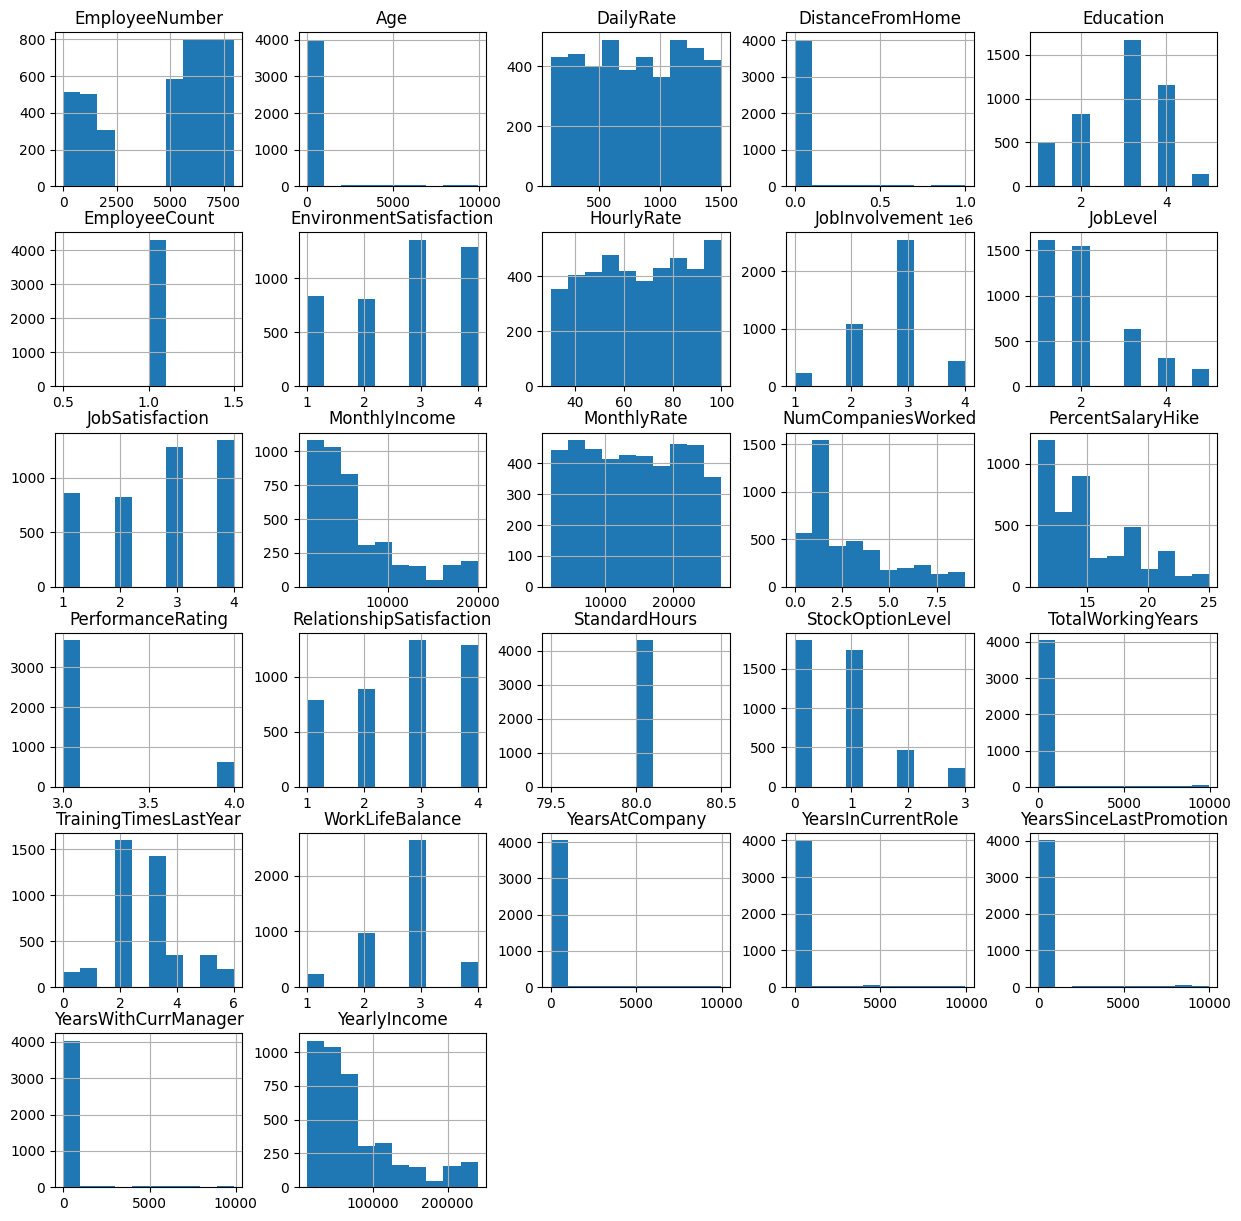

In [ ]:

df.hist(figsize=(15,15))
plt.show()

# Feature engineering/ Data cleaning

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['BusinessTravel_encoded'] = label_encoder.fit_transform(df['BusinessTravel'])
df = df.drop('BusinessTravel', axis=1)

In [ ]:
df.head()

,EmployeeNumber,Age,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome,Attrition,BusinessTravel_encoded
0,104,30.0,852.0,Research & Development,1.0,1.0,Life Sciences,1.0,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,15998.0,1.0,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,61512.0,No,2
1,1638,38.0,397.0,Research & Development,2.0,2.0,Medical,1.0,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,14199.0,3.0,Y,Yes,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,93072.0,No,2
2,164,26.0,841.0,Research & Development,6.0,3.0,Other,1.0,3.0,Female,46.0,2.0,1.0,Research Scientist,2.0,Married,2368.0,23300.0,1.0,Y,No,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,28416.0,No,2
3,395,28.0,1117.0,Research & Development,8.0,2.0,Life Sciences,1.0,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,4488.0,1.0,Y,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,39720.0,No,2
4,53,35.0,464.0,Research & Development,4.0,2.0,Other,1.0,3.0,Male,75.0,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,10910.0,1.0,Y,No,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,23412.0,No,2


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Department_encoded'] = label_encoder.fit_transform(df['Department'])
df = df.drop('Department', axis=1)

In [ ]:
df = df.drop('EducationField', axis=1)

In [ ]:
df.head()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome,Attrition,BusinessTravel_encoded,Department_encoded
0,104,30.0,852.0,1.0,1.0,1.0,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,15998.0,1.0,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,61512.0,No,2,1
1,1638,38.0,397.0,2.0,2.0,1.0,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,14199.0,3.0,Y,Yes,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,93072.0,No,2,1
2,164,26.0,841.0,6.0,3.0,1.0,3.0,Female,46.0,2.0,1.0,Research Scientist,2.0,Married,2368.0,23300.0,1.0,Y,No,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,28416.0,No,2,1
3,395,28.0,1117.0,8.0,2.0,1.0,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,4488.0,1.0,Y,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,39720.0,No,2,1
4,53,35.0,464.0,4.0,2.0,1.0,3.0,Male,75.0,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,10910.0,1.0,Y,No,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,23412.0,No,2,1


In [ ]:
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})
df['Gender'].astype(int)

0       1
1       0
2       0
3       0
4       1
       ..
4444    0
4445    0
4446    1
4447    1
4448    1
Name: Gender, Length: 4302, dtype: int64

In [ ]:
df.columns

Index(['EmployeeNumber', 'Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'YearlyIncome', 'Attrition',
       'BusinessTravel_encoded', 'Department_encoded'],
      dtype='object')

In [ ]:
df['Attrition'].unique()

['No', 'Yes']
Categories (2, object): ['No', 'Yes']

In [ ]:
df['Attrition'] = df['Attrition'].replace({'Yes': 1, 'No': 0})
df['Attrition'].astype(int)

0       0
1       0
2       0
3       0
4       0
       ..
4444    1
4445    1
4446    1
4447    1
4448    1
Name: Attrition, Length: 4302, dtype: int64

In [ ]:
df['OverTime'].unique()

['Yes', 'No']
Categories (2, object): ['No', 'Yes']

In [ ]:
df['OverTime'] = df['OverTime'].replace({'Yes': 1, 'No': 0})
df['OverTime'].astype(int)

0       1
1       1
2       0
3       0
4       0
       ..
4444    0
4445    0
4446    0
4447    0
4448    0
Name: OverTime, Length: 4302, dtype: int64

In [ ]:
df = df.drop('Over18', axis=1)

In [ ]:
df['MaritalStatus'].unique()

array(['Married', 'Single', 'Divorced'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['MaritalStatus_encoded'] = label_encoder.fit_transform(df['MaritalStatus'])
df = df.drop('MaritalStatus', axis=1)

In [ ]:
df['JobRole'].unique()

['Laboratory Technician', 'Manufacturing Director', 'Research Scientist', 'Human Resources', 'Research Director', 'Sales Representative', 'Manager', 'Healthcare Representative', 'Sales Executive']
Categories (9, object): ['Healthcare Representative', 'Human Resources', 'Laboratory Technician', 'Manager', ...,
                         'Research Director', 'Research Scientist', 'Sales Executive',
                         'Sales Representative']

In [ ]:
df[df['JobRole']=='Sales Executive']['MonthlyIncome'].mean()

6964.825263157894

JobRole categorizing

In [ ]:
mapping = {'Laboratory Technician': 2, #3241
           'Manufacturing Director': 6, #7253
           'Research Scientist': 3, #3251
           'Human Resources': 4, #4277
           'Research Director': 8, #16045
           'Sales Representative': 1, #2629
           'Manager': 9, #17155
           'Healthcare Representative': 7, #7586
           'Sales Executive': 5} #6964

df['JobRole_encoded'] = df['JobRole'].map(mapping)
df['JobRole_encoded']=df['JobRole_encoded'].astype(int)

In [ ]:
df['JobRole_encoded'].unique()

array([2, 6, 3, 4, 8, 1, 9, 7, 5])

In [ ]:
df = df.drop('JobRole', axis=1)

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()

# # Transformacja kolumny 'JobRole' przy użyciu LabelEncoder
# df['JobRole_encoded'] = label_encoder.fit_transform(df['JobRole'])
# df = df.drop('JobRole', axis=1)

In [ ]:
df.head()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome,Attrition,BusinessTravel_encoded,Department_encoded,MaritalStatus_encoded,JobRole_encoded
0,104,30.0,852.0,1.0,1.0,1.0,4.0,1,55.0,2.0,2.0,4.0,5126.0,15998.0,1.0,1,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,61512.0,0,2,1,1,2
1,1638,38.0,397.0,2.0,2.0,1.0,4.0,0,54.0,2.0,3.0,3.0,7756.0,14199.0,3.0,1,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,93072.0,0,2,1,1,6
2,164,26.0,841.0,6.0,3.0,1.0,3.0,0,46.0,2.0,1.0,2.0,2368.0,23300.0,1.0,0,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,28416.0,0,2,1,1,3
3,395,28.0,1117.0,8.0,2.0,1.0,4.0,0,66.0,3.0,1.0,4.0,3310.0,4488.0,1.0,0,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,39720.0,0,2,1,2,3
4,53,35.0,464.0,4.0,2.0,1.0,3.0,1,75.0,3.0,1.0,4.0,1951.0,10910.0,1.0,0,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,23412.0,0,2,1,0,2


In [ ]:
df.columns

Index(['EmployeeNumber', 'Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'YearlyIncome',
       'Attrition', 'BusinessTravel_encoded', 'Department_encoded',
       'MaritalStatus_encoded', 'JobRole_encoded'],
      dtype='object')

In [ ]:
df['Attrition']

0       0
1       0
2       0
3       0
4       0
       ..
4444    1
4445    1
4446    1
4447    1
4448    1
Name: Attrition, Length: 4302, dtype: category
Categories (2, int64): [0, 1]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4302 entries, 0 to 4448
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   EmployeeNumber            4302 non-null   int64   
 1   Age                       4302 non-null   float64 
 2   DailyRate                 4302 non-null   float64 
 3   DistanceFromHome          4302 non-null   float64 
 4   Education                 4302 non-null   float64 
 5   EmployeeCount             4302 non-null   float64 
 6   EnvironmentSatisfaction   4302 non-null   float64 
 7   Gender                    4302 non-null   category
 8   HourlyRate                4302 non-null   float64 
 9   JobInvolvement            4302 non-null   float64 
 10  JobLevel                  4302 non-null   float64 
 11  JobSatisfaction           4302 non-null   float64 
 12  MonthlyIncome             4302 non-null   float64 
 13  MonthlyRate               4302 non-null   float6

In [ ]:
df['Attrition'] = df['Attrition'].astype(int)
df['OverTime'] = df['OverTime'].astype(int)
df['Gender'] = df['Gender'].astype(int)

In [ ]:
df = df.drop('YearlyIncome', axis=1)

In [ ]:
df.head()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,BusinessTravel_encoded,Department_encoded,MaritalStatus_encoded,JobRole_encoded
0,104,30.0,852.0,1.0,1.0,1.0,4.0,1,55.0,2.0,2.0,4.0,5126.0,15998.0,1.0,1,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,0,2,1,1,2
1,1638,38.0,397.0,2.0,2.0,1.0,4.0,0,54.0,2.0,3.0,3.0,7756.0,14199.0,3.0,1,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,0,2,1,1,6
2,164,26.0,841.0,6.0,3.0,1.0,3.0,0,46.0,2.0,1.0,2.0,2368.0,23300.0,1.0,0,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,0,2,1,1,3
3,395,28.0,1117.0,8.0,2.0,1.0,4.0,0,66.0,3.0,1.0,4.0,3310.0,4488.0,1.0,0,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,0,2,1,2,3
4,53,35.0,464.0,4.0,2.0,1.0,3.0,1,75.0,3.0,1.0,4.0,1951.0,10910.0,1.0,0,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,0,2,1,0,2


In [ ]:
df = df.drop(columns='EmployeeCount')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4302 entries, 0 to 4448
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            4302 non-null   int64  
 1   Age                       4302 non-null   float64
 2   DailyRate                 4302 non-null   float64
 3   DistanceFromHome          4302 non-null   float64
 4   Education                 4302 non-null   float64
 5   EnvironmentSatisfaction   4302 non-null   float64
 6   Gender                    4302 non-null   int64  
 7   HourlyRate                4302 non-null   float64
 8   JobInvolvement            4302 non-null   float64
 9   JobLevel                  4302 non-null   float64
 10  JobSatisfaction           4302 non-null   float64
 11  MonthlyIncome             4302 non-null   float64
 12  MonthlyRate               4302 non-null   float64
 13  NumCompaniesWorked        4302 non-null   float64
 14  OverTime

In [ ]:
df = df.drop('StandardHours', axis=1)

We have alread Monthly Rate column

In [ ]:
df = df.drop('HourlyRate', axis=1)

In [ ]:
df = df.drop('DailyRate', axis=1)

Education should not affect attrition

In [ ]:
df = df.drop('Education', axis=1)

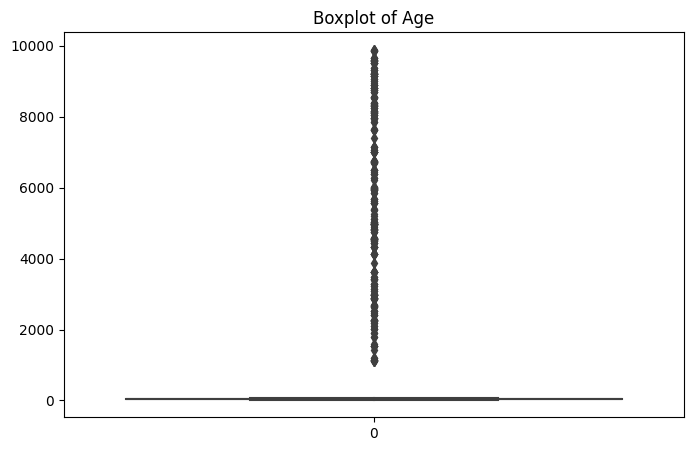

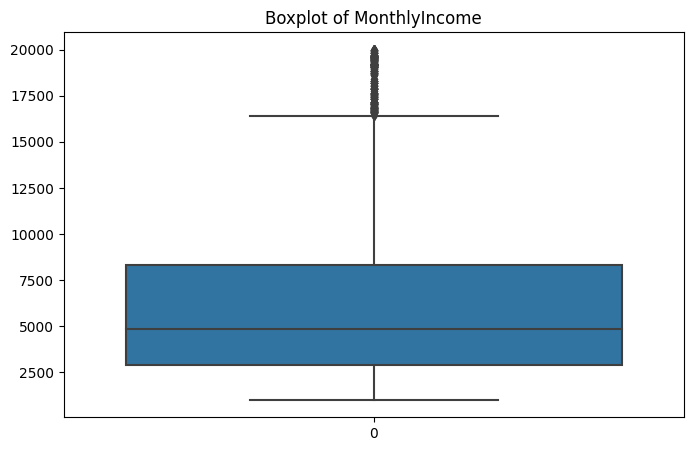

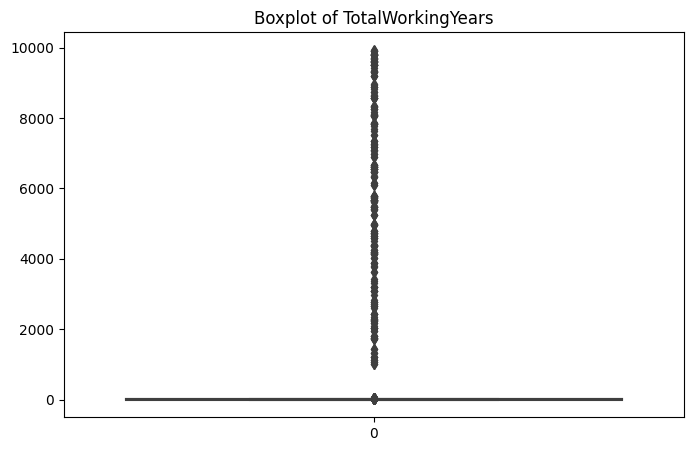

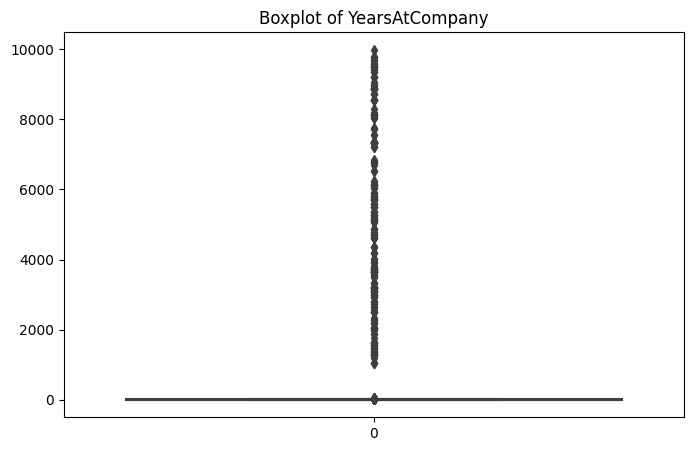

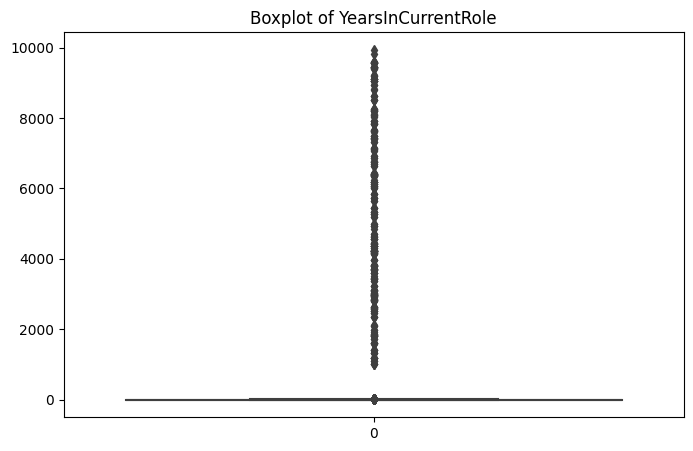

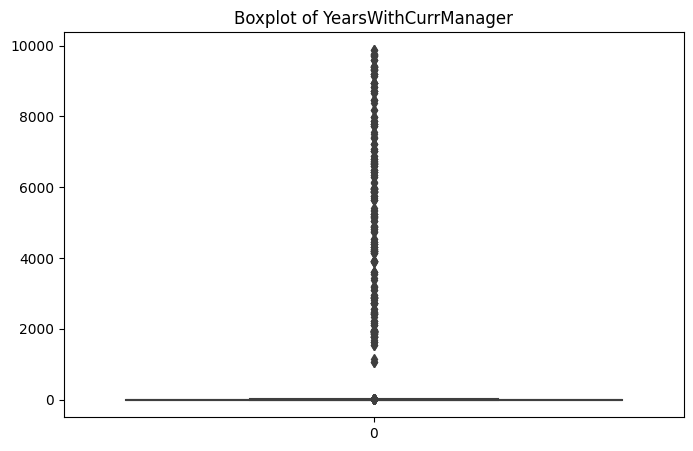

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = ['Age', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']

for column in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df[column])
    plt.title(f"Boxplot of {column}")
    plt.show()

In [ ]:
#Backup before outliers
parquet_file_path = '/content/drive/MyDrive/Kurs/employee_attrition_prediction/df_before_outliers.parquet'

df.to_parquet(parquet_file_path, engine='pyarrow')

In [ ]:
parquet_file_path = '/content/drive/MyDrive/Kurs/employee_attrition_prediction/df_before_outliers.parquet'
table = pq.read_table(parquet_file_path)
df = table.to_pandas()

Outliers

In [ ]:
df['Age'].value_counts()

34.0      218
35.0      212
29.0      190
36.0      185
31.0      182
         ... 
3871.0      1
1126.0      1
5582.0      1
2637.0      1
8703.0      1
Name: Age, Length: 179, dtype: int64

In [ ]:
df['Age'][df['Age']>100].value_counts().sort_values()

1126.0    1
2459.0    1
7390.0    1
6715.0    1
2641.0    1
         ..
8744.0    3
2882.0    3
7015.0    3
4553.0    3
5565.0    3
Name: Age, Length: 136, dtype: int64

In [ ]:
df[df['Age']>100].head()

,EmployeeNumber,Age,DistanceFromHome,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,BusinessTravel_encoded,Department_encoded,MaritalStatus_encoded,JobRole_encoded
1479,5010,8825.0,9.0,1.0,0,3.0,1.0,3.0,2742.0,3072.0,1.0,0,15.0,3.0,4.0,0.0,2.0,0.0,3.0,2.0,2.0,2.0,2.0,1,2,0,1,4
1480,5011,8825.0,9.0,1.0,0,3.0,1.0,3.0,2742.0,3072.0,1.0,0,15.0,3.0,4.0,0.0,2.0,0.0,3.0,2.0,2.0,2.0,2.0,1,2,0,1,4
1499,5030,3628.0,3.0,2.0,0,3.0,1.0,4.0,1569.0,18420.0,1.0,1,12.0,3.0,3.0,0.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,1,1,2,2,1
1517,5048,6287.0,3.0,3.0,0,4.0,2.0,4.0,5231.0,23726.0,2.0,1,13.0,3.0,2.0,1.0,17.0,1.0,2.0,5.0,3.0,1.0,3.0,1,2,1,1,2
1518,5049,6287.0,3.0,3.0,0,4.0,2.0,4.0,5231.0,23726.0,2.0,1,13.0,3.0,2.0,1.0,17.0,1.0,2.0,5.0,3.0,1.0,3.0,1,2,1,1,2


In [ ]:
df[df['YearsSinceLastPromotion'] > 80].head()

,EmployeeNumber,Age,DistanceFromHome,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,BusinessTravel_encoded,Department_encoded,MaritalStatus_encoded,JobRole_encoded
1470,5001,30.0,1.0,4.0,1,2.0,2.0,4.0,5126.0,15998.0,1.0,1,12.0,3.0,3.0,2.0,10.0,1.0,2.0,10.0,8.0,8080.0,0.0,0,2,1,1,2
1471,5002,30.0,1.0,4.0,1,2.0,2.0,4.0,5126.0,15998.0,1.0,1,12.0,3.0,3.0,2.0,10.0,1.0,2.0,10.0,8.0,8080.0,0.0,1,2,1,1,2
1472,5003,30.0,1.0,4.0,1,2.0,2.0,4.0,5126.0,15998.0,1.0,1,12.0,3.0,3.0,2.0,10.0,1.0,2.0,10.0,8.0,8080.0,0.0,0,2,1,1,2
1496,5027,38.0,1.0,2.0,0,4.0,2.0,4.0,7625.0,19383.0,0.0,0,13.0,3.0,3.0,0.0,10.0,4.0,2.0,9.0,7.0,3720.0,8.0,1,2,1,2,7
1497,5028,38.0,1.0,2.0,0,4.0,2.0,4.0,7625.0,19383.0,0.0,0,13.0,3.0,3.0,0.0,10.0,4.0,2.0,9.0,7.0,3720.0,8.0,1,2,1,2,7


In [ ]:
df['YearsSinceLastPromotion'][df['YearsSinceLastPromotion']<80].value_counts().sort_values()

10.0      16
12.0      24
14.0      25
13.0      29
8.0       38
15.0      40
9.0       44
11.0      63
6.0       87
5.0      125
3.0      150
4.0      167
7.0      196
2.0      445
1.0      979
0.0     1580
Name: YearsSinceLastPromotion, dtype: int64

In [ ]:
df['YearsSinceLastPromotion'][df['YearsSinceLastPromotion']>80].value_counts().sort_values().sum()

294

In [ ]:
df[df['YearsInCurrentRole'] > 80].head()

,EmployeeNumber,Age,DistanceFromHome,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,BusinessTravel_encoded,Department_encoded,MaritalStatus_encoded,JobRole_encoded
1508,5039,53.0,5.0,3.0,0,3.0,5.0,3.0,19094.0,10735.0,4.0,0,11.0,3.0,4.0,1.0,26.0,3.0,2.0,14.0,3099.0,4.0,8.0,1,2,1,0,9
1509,5040,53.0,5.0,3.0,0,3.0,5.0,3.0,19094.0,10735.0,4.0,0,11.0,3.0,4.0,1.0,26.0,3.0,2.0,14.0,3099.0,4.0,8.0,1,2,1,0,9
1534,5065,38.0,12.0,1.0,1,2.0,2.0,1.0,6288.0,4284.0,2.0,0,15.0,3.0,3.0,1.0,13.0,3.0,2.0,4.0,3591.0,1.0,2.0,0,1,1,0,7
1540,5071,38.0,2.0,4.0,1,3.0,3.0,2.0,7351.0,20619.0,7.0,0,16.0,3.0,3.0,0.0,10.0,2.0,3.0,1.0,6908.0,0.0,0.0,1,2,2,2,5
1541,5072,38.0,2.0,4.0,1,3.0,3.0,2.0,7351.0,20619.0,7.0,0,16.0,3.0,3.0,0.0,10.0,2.0,3.0,1.0,6908.0,0.0,0.0,0,2,2,2,5


In [ ]:
df['YearsInCurrentRole'][df['YearsInCurrentRole']>80].value_counts().sort_values()

4656.0    1
7925.0    1
5834.0    1
1191.0    1
2848.0    1
         ..
8497.0    3
1335.0    3
6131.0    3
3683.0    3
9551.0    5
Name: YearsInCurrentRole, Length: 145, dtype: int64

In [ ]:
df['YearsInCurrentRole'][df['YearsInCurrentRole']>80].value_counts().sort_values().sum()

300

In [ ]:
df[df['YearsWithCurrManager'] > 80].head()

,EmployeeNumber,Age,DistanceFromHome,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,BusinessTravel_encoded,Department_encoded,MaritalStatus_encoded,JobRole_encoded
1489,5020,48.0,4.0,4.0,1,3.0,3.0,4.0,7898.0,18706.0,1.0,0,11.0,3.0,3.0,0.0,11.0,2.0,3.0,10.0,9.0,0.0,1798.0,1,2,1,2,6
1490,5021,48.0,4.0,4.0,1,3.0,3.0,4.0,7898.0,18706.0,1.0,0,11.0,3.0,3.0,0.0,11.0,2.0,3.0,10.0,9.0,0.0,1798.0,1,2,1,2,6
1504,5035,30.0,4.0,3.0,1,3.0,1.0,4.0,2285.0,3427.0,9.0,1,23.0,4.0,3.0,0.0,3.0,4.0,3.0,1.0,0.0,0.0,9404.0,1,1,1,2,3
1505,5036,30.0,4.0,3.0,1,3.0,1.0,4.0,2285.0,3427.0,9.0,1,23.0,4.0,3.0,0.0,3.0,4.0,3.0,1.0,0.0,0.0,9404.0,0,1,1,2,3
1506,5037,30.0,4.0,3.0,1,3.0,1.0,4.0,2285.0,3427.0,9.0,1,23.0,4.0,3.0,0.0,3.0,4.0,3.0,1.0,0.0,0.0,9404.0,1,1,1,2,3


In [ ]:
df['YearsWithCurrManager'][df['YearsWithCurrManager']>80].value_counts().sort_values()

6683.0    1
8170.0    1
6700.0    1
6746.0    1
2106.0    1
         ..
1845.0    3
2220.0    3
4321.0    3
5987.0    3
8932.0    4
Name: YearsWithCurrManager, Length: 139, dtype: int64

In [ ]:
df[df['YearsAtCompany'] > 80].head()

,EmployeeNumber,Age,DistanceFromHome,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,BusinessTravel_encoded,Department_encoded,MaritalStatus_encoded,JobRole_encoded
1488,5019,40.0,4.0,4.0,0,3.0,5.0,3.0,19033.0,6499.0,1.0,0,14.0,3.0,2.0,1.0,21.0,2.0,3.0,5078.0,8.0,9.0,9.0,1,2,1,1,9
1507,5038,21.0,22.0,3.0,1,3.0,1.0,3.0,3447.0,24444.0,1.0,0,11.0,3.0,3.0,0.0,3.0,2.0,3.0,7345.0,2.0,1.0,2.0,1,2,2,2,1
1512,5043,28.0,1.0,3.0,1,3.0,1.0,4.0,2706.0,10494.0,1.0,0,15.0,3.0,2.0,1.0,3.0,2.0,3.0,3079.0,2.0,2.0,2.0,1,0,0,0,4
1513,5044,28.0,1.0,3.0,1,3.0,1.0,4.0,2706.0,10494.0,1.0,0,15.0,3.0,2.0,1.0,3.0,2.0,3.0,3079.0,2.0,2.0,2.0,1,0,0,0,4
1514,5045,28.0,1.0,3.0,1,3.0,1.0,4.0,2706.0,10494.0,1.0,0,15.0,3.0,2.0,1.0,3.0,2.0,3.0,3079.0,2.0,2.0,2.0,1,0,0,0,4


In [ ]:
df['YearsAtCompany'][df['YearsAtCompany']>80].value_counts().sort_values()

5078.0    1
1184.0    1
2072.0    1
2551.0    1
6144.0    1
         ..
8110.0    3
3079.0    3
4369.0    3
8553.0    3
1488.0    3
Name: YearsAtCompany, Length: 129, dtype: int64

In [ ]:
df[df['TotalWorkingYears'] > 80].head()

,EmployeeNumber,Age,DistanceFromHome,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,BusinessTravel_encoded,Department_encoded,MaritalStatus_encoded,JobRole_encoded
1473,5004,38.0,2.0,4.0,0,2.0,3.0,3.0,7756.0,14199.0,3.0,1,19.0,3.0,4.0,1.0,6618.0,6.0,4.0,5.0,4.0,0.0,2.0,0,2,1,1,6
1474,5005,38.0,2.0,4.0,0,2.0,3.0,3.0,7756.0,14199.0,3.0,1,19.0,3.0,4.0,1.0,6618.0,6.0,4.0,5.0,4.0,0.0,2.0,1,2,1,1,6
1475,5006,26.0,6.0,3.0,0,2.0,1.0,2.0,2368.0,23300.0,1.0,0,19.0,3.0,3.0,0.0,3808.0,3.0,2.0,5.0,4.0,4.0,3.0,1,2,1,1,3
1485,5016,34.0,6.0,4.0,0,1.0,1.0,3.0,2351.0,12253.0,0.0,0,16.0,3.0,4.0,1.0,2764.0,3.0,2.0,2.0,2.0,1.0,0.0,0,1,2,0,1
1486,5017,34.0,6.0,4.0,0,1.0,1.0,3.0,2351.0,12253.0,0.0,0,16.0,3.0,4.0,1.0,2764.0,3.0,2.0,2.0,2.0,1.0,0.0,1,1,2,0,1


In [ ]:
df['TotalWorkingYears'][df['TotalWorkingYears']>80].value_counts().sort_values()

1123.0    1
5377.0    1
8929.0    1
8104.0    1
7223.0    1
         ..
1758.0    3
2041.0    3
6566.0    3
2450.0    3
4795.0    3
Name: TotalWorkingYears, Length: 132, dtype: int64

A lot of outliers - it's hard to find a reason why these data look like this.

Outliers do not overlap with each other

YearsSinceLastPromotion is similar to YearsInCurrentRole.

In [ ]:
df.loc[df['YearsSinceLastPromotion'] > 80, 'YearsSinceLastPromotion'] = df['YearsInCurrentRole']

In [ ]:
years_without_work = df['Age'] - df['TotalWorkingYears']

In [ ]:
years_without_work.median()

24.0

In [ ]:
df.loc[df['TotalWorkingYears'] > 80, 'TotalWorkingYears'] = df['Age'] - 24.0

In [ ]:
df['TotalWorkingYears'][df['TotalWorkingYears']>80].value_counts().sort_values()

Series([], Name: TotalWorkingYears, dtype: int64)

In [ ]:
df.loc[df['Age'] > 100, 'Age'] = df['TotalWorkingYears'] + 24.0

In [ ]:
df['Age'][df['Age']>100].value_counts().sort_values()

Series([], Name: Age, dtype: int64)

In [ ]:
df['YearsInCurrentRole'].median()

3.0

In [ ]:
df[df['YearsInCurrentRole'] <= 80]['YearsInCurrentRole'].mean()

4.208145927036481

In [ ]:
df[df['YearsWithCurrManager'] <= 80]['YearsWithCurrManager'].median()

3.0

In [ ]:
df[df['YearsWithCurrManager'] <= 80]['YearsWithCurrManager'].mean()

4.117997025285077

In [ ]:
df.loc[df['YearsInCurrentRole'] > 80, 'YearsInCurrentRole'] = df['YearsWithCurrManager']

In [ ]:
df.loc[df['YearsWithCurrManager'] > 80, 'YearsWithCurrManager'] = df['YearsInCurrentRole']

In [ ]:
df['YearsInCurrentRole'][df['YearsInCurrentRole']>80].value_counts().sort_values()

Series([], Name: YearsInCurrentRole, dtype: int64)

In [ ]:
df['YearsWithCurrManager'][df['YearsWithCurrManager']>80].value_counts().sort_values()

Series([], Name: YearsWithCurrManager, dtype: int64)

In [ ]:
(df[df['YearsAtCompany'] <= 80]['YearsAtCompany'] - df[df['YearsAtCompany'] <= 80]['YearsInCurrentRole']).mean()

2.77805239742956

In [ ]:
(df[df['YearsAtCompany'] <= 80]['YearsAtCompany'] - df[df['YearsAtCompany'] <= 80]['YearsInCurrentRole']).median()

1.0

In [ ]:
(df[df['YearsAtCompany'] <= 80][df['TotalWorkingYears'] > 15]['YearsAtCompany'] - df[df['YearsAtCompany'] <= 80][df['TotalWorkingYears'] > 15]['YearsInCurrentRole']).median()

3.0

In [ ]:
(df[df['YearsAtCompany'] <= 80][df['TotalWorkingYears'] > 5]['YearsAtCompany'] - df[df['YearsAtCompany'] <= 80][df['TotalWorkingYears'] > 5]['YearsInCurrentRole']).median()

2.0

In [ ]:
(df[df['YearsAtCompany'] <= 80][(df['TotalWorkingYears'] > 15)&(df['TotalWorkingYears'] < 30)]['YearsAtCompany'] - df[df['YearsAtCompany'] <= 80][(df['TotalWorkingYears'] > 15)&(df['TotalWorkingYears'] < 30)]['YearsInCurrentRole']).median()

3.0

In [ ]:
df[df['YearsSinceLastPromotion']==0].loc[df['YearsAtCompany'] > 80, 'YearsAtCompany'] = df['YearsInCurrentRole']

In [ ]:
df = df[df['YearsAtCompany'] <= 80]

In [ ]:
df[df['DistanceFromHome']>100]['DistanceFromHome'].value_counts().sort_index()

102583.0    2
102637.0    3
119377.0    3
123628.0    2
135607.0    2
           ..
975446.0    3
992947.0    2
993161.0    3
997422.0    2
999590.0    3
Name: DistanceFromHome, Length: 129, dtype: int64

In [ ]:
df[df['DistanceFromHome']>100]['DistanceFromHome'].value_counts().sort_values()

302984.0    1
740696.0    1
918326.0    1
411835.0    1
860358.0    1
           ..
678387.0    3
999590.0    3
274206.0    3
975446.0    3
918785.0    3
Name: DistanceFromHome, Length: 129, dtype: int64

In [ ]:
df[df['DistanceFromHome']<100]['DistanceFromHome'].value_counts().sort_index()


1.0     529
2.0     552
3.0     212
4.0     151
5.0     162
6.0     150
7.0     215
8.0     199
9.0     218
10.0    224
11.0     80
12.0     57
13.0     52
14.0     45
15.0     70
16.0     84
17.0     59
18.0     71
19.0     54
20.0     68
21.0     54
22.0     40
23.0     68
24.0     72
25.0     69
26.0     67
27.0     26
28.0     55
29.0     64
Name: DistanceFromHome, dtype: int64

In [ ]:
df[df['DistanceFromHome']<100]['DistanceFromHome'].median()

7.0

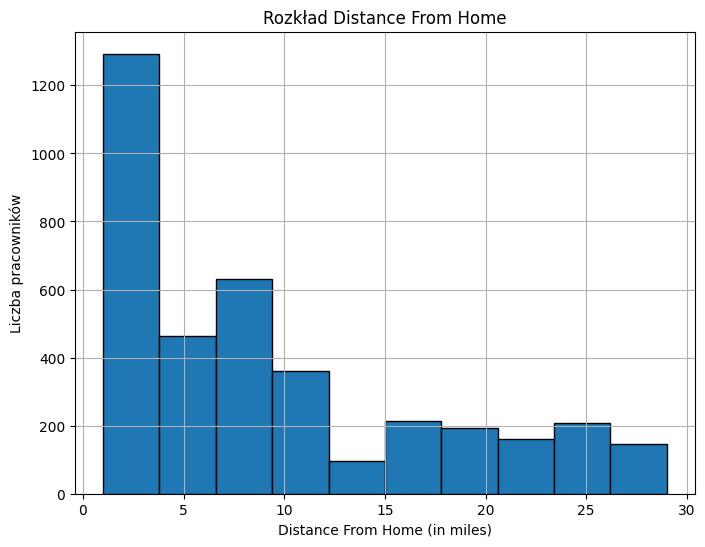

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df[df['DistanceFromHome']<100]['DistanceFromHome'], bins=10, edgecolor='black')
plt.title('Rozkład Distance From Home')
plt.xlabel('Distance From Home (in miles)')
plt.ylabel('Liczba pracowników')
plt.grid(True)
plt.show()

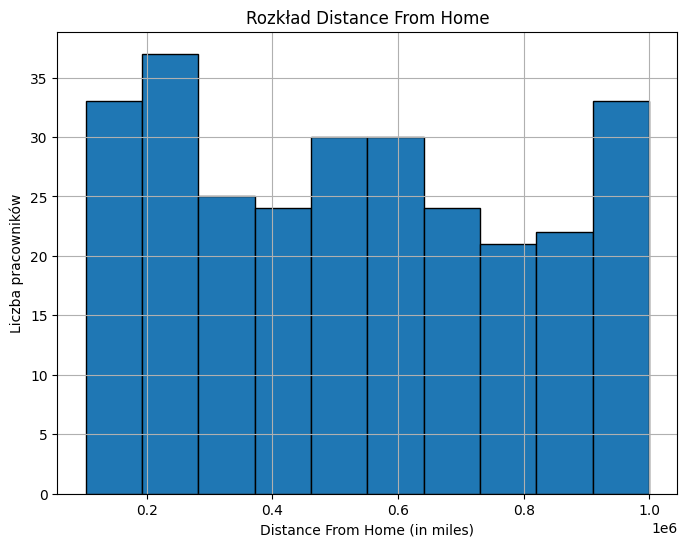

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df[df['DistanceFromHome']>100]['DistanceFromHome'], bins=10, edgecolor='black')
plt.title('Rozkład Distance From Home')
plt.xlabel('Distance From Home (in miles)')
plt.ylabel('Liczba pracowników')
plt.grid(True)
plt.show()

In [ ]:
df.loc[df['DistanceFromHome'] > 80, 'DistanceFromHome'] = 7.0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4046 entries, 0 to 4448
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            4046 non-null   int64  
 1   Age                       4046 non-null   float64
 2   DistanceFromHome          4046 non-null   float64
 3   EnvironmentSatisfaction   4046 non-null   float64
 4   Gender                    4046 non-null   int64  
 5   JobInvolvement            4046 non-null   float64
 6   JobLevel                  4046 non-null   float64
 7   JobSatisfaction           4046 non-null   float64
 8   MonthlyIncome             4046 non-null   float64
 9   MonthlyRate               4046 non-null   float64
 10  NumCompaniesWorked        4046 non-null   float64
 11  OverTime                  4046 non-null   int64  
 12  PercentSalaryHike         4046 non-null   float64
 13  PerformanceRating         4046 non-null   float64
 14  Relation

In [ ]:
df.head()

,EmployeeNumber,Age,DistanceFromHome,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,BusinessTravel_encoded,Department_encoded,MaritalStatus_encoded,JobRole_encoded
0,104,30.0,1.0,4.0,1,2.0,2.0,4.0,5126.0,15998.0,1.0,1,12.0,3.0,3.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,0,2,1,1,2
1,1638,38.0,2.0,4.0,0,2.0,3.0,3.0,7756.0,14199.0,3.0,1,19.0,3.0,4.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,0,2,1,1,6
2,164,26.0,6.0,3.0,0,2.0,1.0,2.0,2368.0,23300.0,1.0,0,19.0,3.0,3.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,0,2,1,1,3
3,395,28.0,8.0,4.0,0,3.0,1.0,4.0,3310.0,4488.0,1.0,0,21.0,4.0,4.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,0,2,1,2,3
4,53,35.0,4.0,3.0,1,3.0,1.0,4.0,1951.0,10910.0,1.0,0,12.0,3.0,3.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,0,2,1,0,2


In [ ]:
df.head()

,EmployeeNumber,Age,DistanceFromHome,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,BusinessTravel_encoded,Department_encoded,MaritalStatus_encoded,JobRole_encoded
0,104,30.0,1.0,4.0,1,2.0,2.0,4.0,5126.0,15998.0,1.0,1,12.0,3.0,3.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,0,2,1,1,2
1,1638,38.0,2.0,4.0,0,2.0,3.0,3.0,7756.0,14199.0,3.0,1,19.0,3.0,4.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,0,2,1,1,6
2,164,26.0,6.0,3.0,0,2.0,1.0,2.0,2368.0,23300.0,1.0,0,19.0,3.0,3.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,0,2,1,1,3
3,395,28.0,8.0,4.0,0,3.0,1.0,4.0,3310.0,4488.0,1.0,0,21.0,4.0,4.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,0,2,1,2,3
4,53,35.0,4.0,3.0,1,3.0,1.0,4.0,1951.0,10910.0,1.0,0,12.0,3.0,3.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,0,2,1,0,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4046 entries, 0 to 4448
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            4046 non-null   int64  
 1   Age                       4046 non-null   float64
 2   DistanceFromHome          4046 non-null   float64
 3   EnvironmentSatisfaction   4046 non-null   float64
 4   Gender                    4046 non-null   int64  
 5   JobInvolvement            4046 non-null   float64
 6   JobLevel                  4046 non-null   float64
 7   JobSatisfaction           4046 non-null   float64
 8   MonthlyIncome             4046 non-null   float64
 9   MonthlyRate               4046 non-null   float64
 10  NumCompaniesWorked        4046 non-null   float64
 11  OverTime                  4046 non-null   int64  
 12  PercentSalaryHike         4046 non-null   float64
 13  PerformanceRating         4046 non-null   float64
 14  Relation

In [ ]:
parquet_file_path = '/content/drive/MyDrive/Kurs/employee_attrition_prediction/df_cleaned.parquet'

df.to_parquet(parquet_file_path, engine='pyarrow')

In [ ]:
parquet_file_path = '/content/drive/MyDrive/Kurs/employee_attrition_prediction/df_cleaned.parquet'
table = pq.read_table(parquet_file_path)
df = table.to_pandas()

# Feature Selection and models



In [ ]:
numerical_columns = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'TrainingTimesLastYear']
categorical_columns = ['JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance', 'BusinessTravel_encoded', 'Department_encoded', 'MaritalStatus_encoded', 'JobRole_encoded', 'Gender', 'OverTime']

In [ ]:
for column in categorical_columns:
  df[column] = df[column].astype(int)

In [ ]:
df.isna().sum()

EmployeeNumber              0
Age                         0
DistanceFromHome            0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobSatisfaction             0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Attrition                   0
BusinessTravel_encoded      0
Department_encoded          0
MaritalStatus_encoded       0
JobRole_encoded             0
dtype: int64

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2

X = df[numerical_columns]
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
k_best_numerical = SelectKBest(score_func=f_classif, k='all')
k_best_numerical.fit(X_train, y_train)
feature_numerical_scores = k_best_numerical.scores_
ranking_numerical = pd.DataFrame({'Feature': X_train.columns, 'Score': feature_numerical_scores})
ranking_numerical = ranking_numerical.sort_values(by='Score', ascending=False)
ranking_numerical

,Feature,Score
0,Age,9.668618
6,TotalWorkingYears,6.240535
2,MonthlyIncome,3.423162
8,YearsInCurrentRole,2.473900
7,YearsAtCompany,1.813460
10,YearsWithCurrManager,0.930875
11,TrainingTimesLastYear,0.895827
9,YearsSinceLastPromotion,0.433973
4,NumCompaniesWorked,0.324833
3,MonthlyRate,0.167984


In [ ]:
numerical_columns_to_model = list(ranking_numerical['Feature'])

In [ ]:
X = df[categorical_columns]
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k_best_categorical = SelectKBest(score_func=chi2, k='all')
k_best_categorical.fit(X_train, y_train)
feature_categorical_scores = k_best_categorical.scores_
ranking_categorical = pd.DataFrame({'Feature': X_train.columns, 'Score': feature_categorical_scores})
ranking_categorical = ranking_categorical.sort_values(by='Score', ascending=False)
ranking_categorical

,Feature,Score
12,OverTime,15.740790
5,StockOptionLevel,6.998089
10,JobRole_encoded,5.781778
1,JobLevel,3.158670
9,MaritalStatus_encoded,2.245785
11,Gender,1.381593
2,JobSatisfaction,1.008927
0,JobInvolvement,0.481856
6,WorkLifeBalance,0.291127
4,RelationshipSatisfaction,0.147240


In [ ]:
categorical_columns_to_model = list(ranking_categorical['Feature'])

In [ ]:
X = df[categorical_columns_to_model+numerical_columns_to_model]
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
# columns_to_scale = ['Age', 'MonthlyIncome', 'MonthlyRate', 'TotalWorkingYears',
#                    'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
columns_to_scale = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike', 'TotalWorkingYears',
                   'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])


In [ ]:
def run_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    recall = recall_score(y_test, y_pred)
    print(f"Recall_score for model {model.__class__.__name__}: {recall} ")

In [ ]:
log_model_l1 = LogisticRegression(penalty='l1', solver='liblinear')
log_model_l2 = LogisticRegression(penalty='l2')
svc_model = SVC(C=30, kernel='poly')

for model in [log_model_l1, log_model_l2, svc_model]:
    run_model(model)

Recall_score for model LogisticRegression: 0.5859375 
Recall_score for model LogisticRegression: 0.5885416666666666 
Recall_score for model SVC: 0.5494791666666666 


In [ ]:
X = df[categorical_columns_to_model[:-3]+numerical_columns_to_model[:-2]]
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()

for model in [dt_model, rf_model]:
    run_model(model)

Recall_score for model DecisionTreeClassifier: 0.4375 
Recall_score for model RandomForestClassifier: 0.5390625 


## Logistic Regression

In [ ]:
X = df[categorical_columns_to_model+numerical_columns_to_model]
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
columns_to_scale = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike', 'TotalWorkingYears',
                   'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

In [ ]:
log_model_l2 = LogisticRegression(penalty='l2', solver='liblinear')
log_model_l1 = LogisticRegression(penalty='l1', solver='liblinear')
log_model_elastic = LogisticRegression(penalty='elasticnet', l1_ratio=0.5, C=1.0, solver='saga')

log_model_l2.fit(X_train, y_train)
log_model_l1.fit(X_train, y_train)
log_model_elastic.fit(X_train, y_train)

LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga')

In [ ]:
y_pred_l2 = log_model_l2.predict(X_test)
y_pred_l1 = log_model_l1.predict(X_test)
y_pred_elastic = log_model_elastic.predict(X_test)

In [ ]:
recall_l2 = recall_score(y_test, y_pred_l2)
recall_l1 = recall_score(y_test, y_pred_l1)
recall_elastic = recall_score(y_test, y_pred_elastic)

In [ ]:
print(f'Recall score for Logistic Regression (Ridge):\t {recall_l2}')
print(f'Recall score for Logistic Regression (Lasso):\t {recall_l1}')
print(f'Recall score for Logistic Regression (ElasticNet):\t {recall_elastic}')

Recall score for Logistic Regression (Ridge):	 0.5859375
Recall score for Logistic Regression (Lasso):	 0.5859375
Recall score for Logistic Regression (ElasticNet):	 0.5911458333333334


## Decision Tree Classifier

In [ ]:
X = df[categorical_columns_to_model+numerical_columns_to_model]
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def objective(trial):
    max_depth = trial.suggest_int('max_depth', 3, 15)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 15)

    model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    recall = recall_score(y_test, y_pred)

    return recall

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=300)

[I 2023-10-17 21:55:53,178] A new study created in memory with name: no-name-5e808feb-0f9d-4392-8855-619d44998d8d
[I 2023-10-17 21:55:53,238] Trial 0 finished with value: 0.5416666666666666 and parameters: {'max_depth': 5, 'min_samples_split': 6, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.5416666666666666.
[I 2023-10-17 21:55:53,314] Trial 1 finished with value: 0.4661458333333333 and parameters: {'max_depth': 11, 'min_samples_split': 7, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.5416666666666666.
[I 2023-10-17 21:55:53,360] Trial 2 finished with value: 0.5598958333333334 and parameters: {'max_depth': 10, 'min_samples_split': 13, 'min_samples_leaf': 15}. Best is trial 2 with value: 0.5598958333333334.
[I 2023-10-17 21:55:53,400] Trial 3 finished with value: 0.4453125 and parameters: {'max_depth': 13, 'min_samples_split': 3, 'min_samples_leaf': 14}. Best is trial 2 with value: 0.5598958333333334.
[I 2023-10-17 21:55:53,434] Trial 4 finished with value: 0.5234375 an

In [ ]:
best_params = study.best_params
best_recall = study.best_value

best_tree_model = DecisionTreeClassifier(**best_params)
best_tree_model.fit(X_train, y_train)

y_pred = best_tree_model.predict(X_test)
recall_tree = recall_score(y_test, y_pred)

print("Best params:", best_params)
print("Best recall:", recall_tree)

Best params: {'max_depth': 8, 'min_samples_split': 7, 'min_samples_leaf': 1}
Best recall: 0.5703125


## Random Forest Classifier

In [ ]:
X = df[categorical_columns_to_model+numerical_columns_to_model]
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def objective(trial):
    n_estimators = trial.suggest_categorical('n_estimators', [180, 190, 200, 210, 220, 230, 240, 250])
    max_depth = trial.suggest_int('max_depth', 3, 15)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 15)

    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    recall = recall_score(y_test, y_pred)

    return recall

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=300)

[I 2023-10-17 21:56:14,688] A new study created in memory with name: no-name-696e6821-9cf4-4bea-845d-ab99f75152c9
[I 2023-10-17 21:56:15,750] Trial 0 finished with value: 0.5546875 and parameters: {'n_estimators': 180, 'max_depth': 12, 'min_samples_split': 14, 'min_samples_leaf': 11}. Best is trial 0 with value: 0.5546875.
[I 2023-10-17 21:56:17,155] Trial 1 finished with value: 0.5494791666666666 and parameters: {'n_estimators': 230, 'max_depth': 11, 'min_samples_split': 5, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.5546875.
[I 2023-10-17 21:56:18,088] Trial 2 finished with value: 0.5755208333333334 and parameters: {'n_estimators': 220, 'max_depth': 5, 'min_samples_split': 9, 'min_samples_leaf': 8}. Best is trial 2 with value: 0.5755208333333334.
[I 2023-10-17 21:56:19,619] Trial 3 finished with value: 0.5416666666666666 and parameters: {'n_estimators': 180, 'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 9}. Best is trial 2 with value: 0.5755208333333334.
[I 2

In [ ]:
best_params = study.best_params
best_recall = study.best_value

best_rf_model = RandomForestClassifier(**best_params)
best_rf_model.fit(X_train, y_train)

y_pred = best_rf_model.predict(X_test)
recall_rf = recall_score(y_test, y_pred)

print("Best params:", best_params)
print("Best recall:", recall_rf)

Best params: {'n_estimators': 180, 'max_depth': 3, 'min_samples_split': 20, 'min_samples_leaf': 9}
Best recall: 0.6588541666666666


## XGboost

In [ ]:
X = df[categorical_columns_to_model+numerical_columns_to_model]
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 400),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
    }

    model = xgb.XGBClassifier(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    recall = recall_score(y_test, y_pred)
    return recall

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=300)

[I 2023-10-17 22:00:31,092] A new study created in memory with name: no-name-d7bb7436-9c24-4be8-9542-abfd95b5b4c9
[I 2023-10-17 22:00:31,642] Trial 0 finished with value: 0.5286458333333334 and parameters: {'n_estimators': 205, 'max_depth': 8, 'learning_rate': 0.16660446222726205}. Best is trial 0 with value: 0.5286458333333334.
[I 2023-10-17 22:00:35,303] Trial 1 finished with value: 0.5364583333333334 and parameters: {'n_estimators': 384, 'max_depth': 5, 'learning_rate': 0.08226605785865211}. Best is trial 1 with value: 0.5364583333333334.
[I 2023-10-17 22:00:36,059] Trial 2 finished with value: 0.5390625 and parameters: {'n_estimators': 375, 'max_depth': 7, 'learning_rate': 0.04066634874171849}. Best is trial 2 with value: 0.5390625.
[I 2023-10-17 22:00:36,299] Trial 3 finished with value: 0.5494791666666666 and parameters: {'n_estimators': 165, 'max_depth': 5, 'learning_rate': 0.12071189673183873}. Best is trial 3 with value: 0.5494791666666666.
[I 2023-10-17 22:00:36,689] Trial 4 

In [ ]:
best_params = study.best_params
best_recall = study.best_value

xgb_model = xgb.XGBClassifier(**best_params)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
recall_xgb = recall_score(y_test, y_pred)

print("XGBoost recall:", recall_xgb)

XGBoost recall: 0.5625


## Cross Validation

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [ ]:
models = {
    'DecisionTree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [8],
            'min_samples_split': [7],
            'min_samples_leaf': [1]
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [180],
            'max_depth': [3],
            'min_samples_split': [20],
            'min_samples_leaf': [9]
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(penalty='elasticnet', l1_ratio=0.5, solver='saga'),
        'params': {
            'C': [1.0],
        }
    },
    'XGBoost': {
        'model': xgb.XGBClassifier(),
        'params': {
            'n_estimators': [192],
            'max_depth': [6],
            'learning_rate': [0.1581264403890833]
        }
    }
}

In [ ]:
results = {}

for model_name, model_info in models.items():
    model = model_info['model']
    params = model_info['params']
    grid_search = GridSearchCV(model, params, cv=5, scoring='recall', verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    recalls = cross_val_score(best_model, X_train, y_train, cv=5, scoring='recall')
    results[model_name] = recalls

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [ ]:
models = {
    'DecisionTree': {
    'model': DecisionTreeClassifier(),
    'params': {
        'max_depth': 8,
        'min_samples_split': 7,
        'min_samples_leaf': 1
    }
,
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': 180,
            'max_depth': 3,
            'min_samples_split': 20,
            'min_samples_leaf': 9
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(penalty='elasticnet', l1_ratio=0.5, solver='saga'),
        'params': {
            'C': 1.0,
        }
    },
    'XGBoost': {
        'model': xgb.XGBClassifier(),
        'params': {
            'n_estimators': 192,
            'max_depth': 6,
            'learning_rate': 0.1581264403890833
        }
    }
}

In [ ]:
for model_name, recalls in results.items():
    print(f"Model: {model_name}")
    print("Cross Validation results (recall) for each iteration:")
    for i, recall in enumerate(recalls):
        print(f"Fold {i + 1}: {recall}")
    mean_recall = recalls.mean()
    std_recall = recalls.std()
    print(f"Mean recall: {mean_recall}")
    print(f"STD recall: {std_recall}")
    print("-" * 50)

Model: DecisionTree
Cross Validation results (recall) for each iteration:
Fold 1: 0.4341317365269461
Fold 2: 0.32432432432432434
Fold 3: 0.5645645645645646
Fold 4: 0.4114114114114114
Fold 5: 0.4744744744744745
Mean recall: 0.44178130226034423
STD recall: 0.07864039776531918
--------------------------------------------------
Model: RandomForest
Cross Validation results (recall) for each iteration:
Fold 1: 0.655688622754491
Fold 2: 0.6306306306306306
Fold 3: 0.6696696696696697
Fold 4: 0.5615615615615616
Fold 5: 0.6306306306306306
Mean recall: 0.6296362230493967
STD recall: 0.037195541690505915
--------------------------------------------------
Model: LogisticRegression
Cross Validation results (recall) for each iteration:
Fold 1: 0.7574850299401198
Fold 2: 0.7387387387387387
Fold 3: 0.8798798798798799
Fold 4: 0.6486486486486487
Fold 5: 0.8528528528528528
Mean recall: 0.775521030012048
STD recall: 0.08324159509806056
--------------------------------------------------
Model: XGBoost
Cross 

In [ ]:
test_results = {}

for model_name, model_info in models.items():
    model = model_info['model']
    best_params = model_info['params']

    model.set_params(**best_params)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    recall = recall_score(y_test, y_pred)
    test_results[model_name] = recall

for model_name, recall in test_results.items():
    print(f"Model: {model_name}")
    print(f"Recall for test data: {recall}")
    print("-" * 50)

Model: DecisionTree
Recall for test data: 0.5703125
--------------------------------------------------
Model: RandomForest
Recall for test data: 0.65625
--------------------------------------------------
Model: LogisticRegression
Recall for test data: 0.7604166666666666
--------------------------------------------------
Model: XGBoost
Recall for test data: 0.5625
--------------------------------------------------


# Summary

Results for each model:

In [ ]:
print(f'Logistic Regression model:\trecall score:\t{recall_elastic}')
print(f'Decission Tree model:\t\tecall score:\t{recall_tree}')
print(f'Random Forest model:\t\tecall score:\t{recall_rf}')
print(f'XGboost model:\t\t\tecall score:\t{recall_xgb}')

Logistic Regression model:	recall score:	0.5911458333333334
Decission Tree model:		ecall score:	0.5703125
Random Forest model:		ecall score:	0.6588541666666666
XGboost model:			ecall score:	0.5625


Results for cross validation:

In [ ]:
test_results = {}

for model_name, model_info in models.items():
    model = model_info['model']
    best_params = model_info['params']

    model.set_params(**best_params)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    recall = recall_score(y_test, y_pred)
    test_results[model_name] = recall

for model_name, recall in test_results.items():
    print(f"Model: {model_name}")
    print(f"Recall for test data: {recall}")
    print("-" * 50)

Model: DecisionTree
Recall for test data: 0.5703125
--------------------------------------------------
Model: RandomForest
Recall for test data: 0.6484375
--------------------------------------------------
Model: LogisticRegression
Recall for test data: 0.7604166666666666
--------------------------------------------------
Model: XGBoost
Recall for test data: 0.5625
--------------------------------------------------
